In [28]:
import pandas 
import numpy

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [29]:
seed = 7
numpy.random.seed(seed)

In [30]:

df=pandas.read_csv("train(1).csv")
#df=pandas.read_csv("f.csv")

In [31]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [32]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,80.449760,80.491200,25.504240,13.939880,13.935520,17.348480,17.379280,4.999550,2.452715,2.45097,0.499680,0.499865,0.49906,0.499925,217.998110,217.928765,217.883455,217.880732
std,42.481567,42.457207,7.857326,7.878135,7.876161,9.379925,9.384725,3.000007,1.957956,1.95554,0.500001,0.500001,0.50000,0.500001,369.398349,369.070383,369.058931,369.081649
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,40.690000,40.750000,40.690000,40.680000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.00000,0.000000,69.900000,70.000000,69.870000,69.900000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.00000,1.000000,1.000000,1.00000,1.000000,228.910000,228.580000,228.602500,228.570000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.00000,1.000000,1.000000,1.00000,1.000000,3333.920000,3375.420000,3397.080000,3360.520000


In [33]:
print(df.corr(method='pearson'))

                MWG       NWG       KWG     MDIMC     NDIMC     MDIMA  \
MWG        1.000000  0.001051  0.009029  0.105391 -0.008573  0.158692   
NWG        0.001051  1.000000  0.009568 -0.006963  0.105328  0.014930   
KWG        0.009029  0.009568  1.000000  0.147256  0.149286 -0.034504   
MDIMC      0.105391 -0.006963  0.147256  1.000000 -0.209356  0.196806   
NDIMC     -0.008573  0.105328  0.149286 -0.209356  1.000000  0.083896   
MDIMA      0.158692  0.014930 -0.034504  0.196806  0.083896  1.000000   
NDIMB      0.015913  0.158350 -0.034516  0.084195  0.196434  0.087593   
KWI        0.000872  0.000145 -0.000664 -0.001425 -0.002619  0.000678   
VWM        0.353168 -0.001766 -0.012001 -0.136008  0.012576 -0.203317   
VWN       -0.001284  0.354439 -0.011291  0.010672 -0.133261 -0.019162   
STRM       0.001054  0.001662  0.001232  0.000681 -0.000696 -0.001546   
STRN       0.000206 -0.000050  0.000378  0.001640 -0.000477  0.001096   
SA        -0.001419  0.001333  0.001429  0.000600  

In [34]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f410810c278>


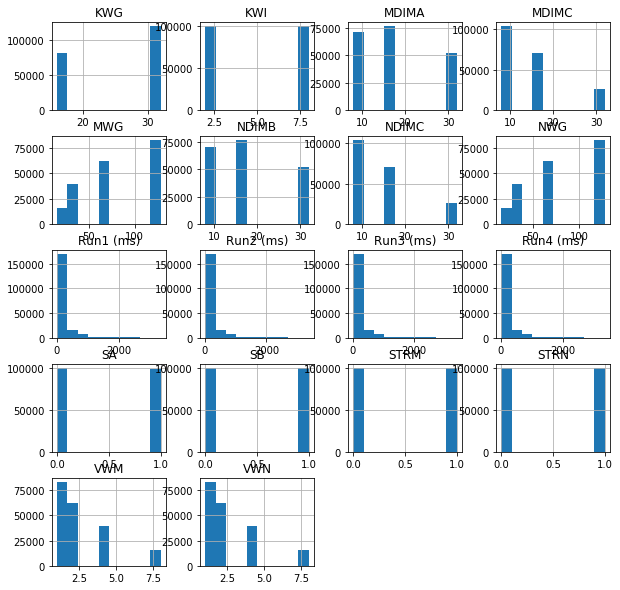

In [35]:
print(df.hist(figsize=(10,10)) ) 

In [36]:
X= df.iloc[:,0:14]
y=df.iloc[:,14:15]


In [37]:
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [38]:
#we use log function which is in numpy
y= np.log1p(y)/2


In [39]:
y.head()

,Run1 (ms)
0,2.832988
1,2.744737
2,2.502376
3,2.855875
4,2.752137


In [40]:
rng = numpy.random.RandomState(1)

In [41]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)#, random_state=19)




In [56]:
clf = AdaBoostRegressor(RandomForestRegressor(max_depth=26),
                          n_estimators=70, random_state=rng,learning_rate=1.0)

In [ ]:

clf.fit(X_train, y_train)


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
#clf = linear_model.SGDRegressor(alpha= 0.01, learning_rate= 'optimal', loss= 'squared_loss', penalty= 'elasticnet')
#clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions=numpy.expm1(predictions*2)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))


    
print(rms)
#predictions

424.20077687583176


In [15]:
clf = linear_model.SGDRegressor(alpha= 0.01, learning_rate= 'optimal', loss= 'squared_loss', penalty= 'elasticnet')
clf.fit(X, y)


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None,
       penalty='elasticnet', power_t=0.25, random_state=None, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [ ]:
clf = AdaBoostRegressor(RandomForestRegressor(max_depth=26),
                          n_estimators=100, random_state=rng,learning_rate=1.0)

In [16]:
test=pandas.read_csv("test.csv")

In [17]:
test.head()

,Id,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,Id_1,64,64,32,8,8,8,8,8,8,8,1,0,0,1
1,Id_2,64,64,32,8,8,8,8,8,8,4,1,1,0,0
2,Id_3,64,64,32,8,8,8,8,8,8,2,1,1,0,1
3,Id_4,64,64,32,8,8,8,8,8,8,2,1,0,1,0
4,Id_5,64,64,32,8,8,8,8,8,8,2,1,0,0,1


In [18]:
test.shape

(41601, 15)

In [19]:
test1= test.iloc[:,1:16]
#y=df.iloc[:,14:15]

In [20]:
scaler = StandardScaler()
scaler.fit(test1)
X= scaler.transform(test1)

In [24]:
predictions = clf.predict(X)

predictions=numpy.expm1(predictions*2)


In [25]:
print(predictions)

[132.6772078  146.89934647 144.95891088 ... 190.29590892 229.17574434
 229.8186695 ]


In [26]:
#ans=pandas.read_csv("ans.csv")
ans=pandas.read_csv("mytest.csv")
#sampleSubmission = .values
# print(ans)

#X =sampleSubmission[:,0:1]
raw_data={'Run1 (ms)' : predictions}
#@ID={'Id':X}
#ans.insert(1,'area', predictions, allow_duplicates=True)
s = pandas.DataFrame(raw_data, columns = ['Run1 (ms)'])
ans=pandas.concat([ans,s],axis=1)
#ans['area'] = predictions
ans.to_csv('mytest.csv')

In [ ]:
#anss=pandas.read_csv("myteam.csv")
